In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer

import matplotlib.pyplot as plt

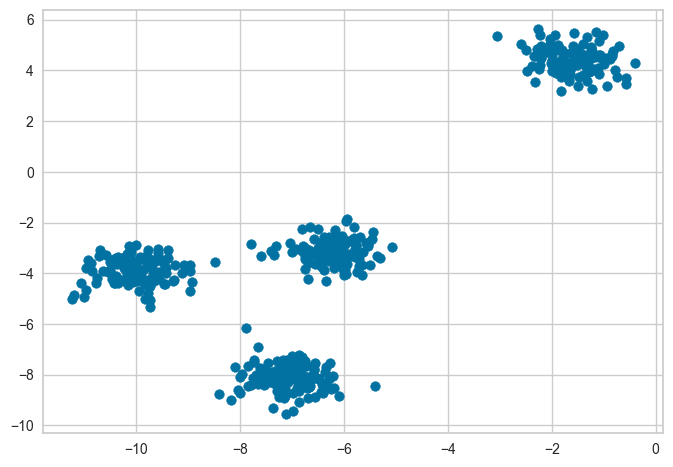

In [3]:
# dataset
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=0.5,
    center_box=(-10, 10),
    shuffle=True,
    random_state=1
)

# plot dataset
plt.scatter(X[:, 0], X[:, 1]);

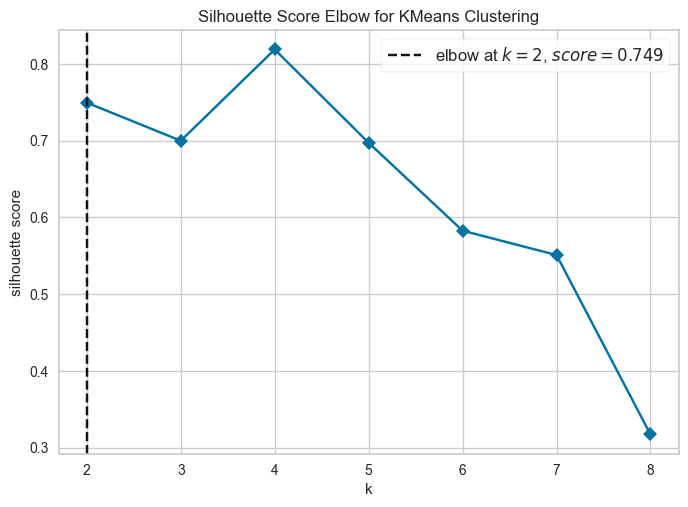

In [4]:
clusters = [ 2, 3, 4, 5, 6, 7, 8 ]

kmeans = KElbowVisualizer( KMeans(), k=clusters, metric='silhouette', timings=False)
kmeans.fit(X)
kmeans.show();

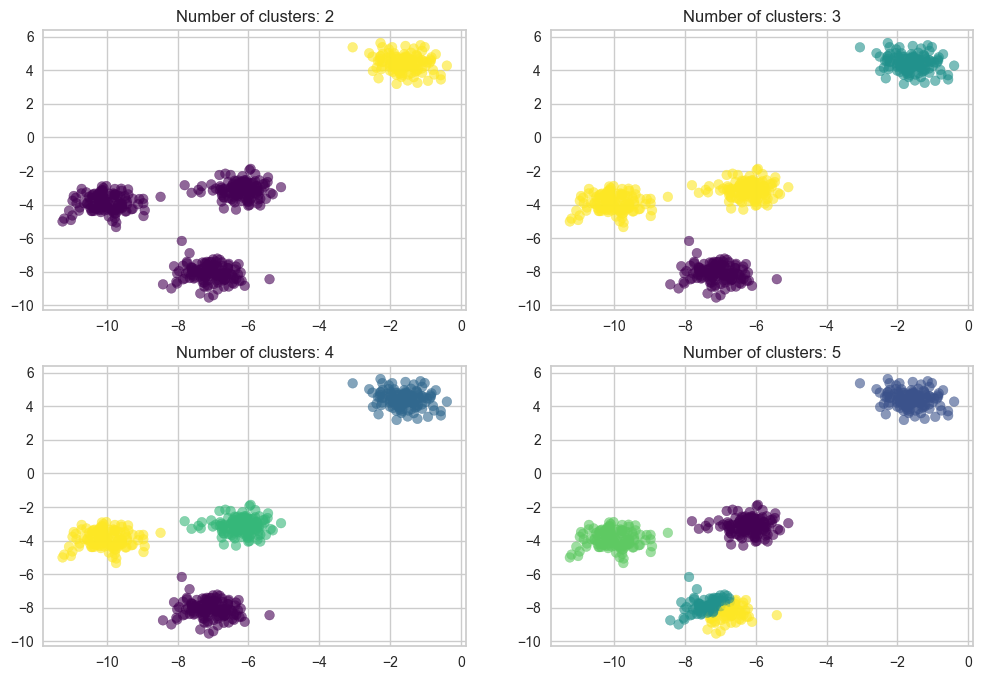

In [37]:
clusters = [ 2, 3, 4, 5 ]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for k, ax in zip(clusters, axes.ravel()):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    kmeans.fit(X)

    ax.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, alpha=0.6, cmap=plt.cm.viridis)
    ax.set_title(f'Number of clusters: {k}')
    

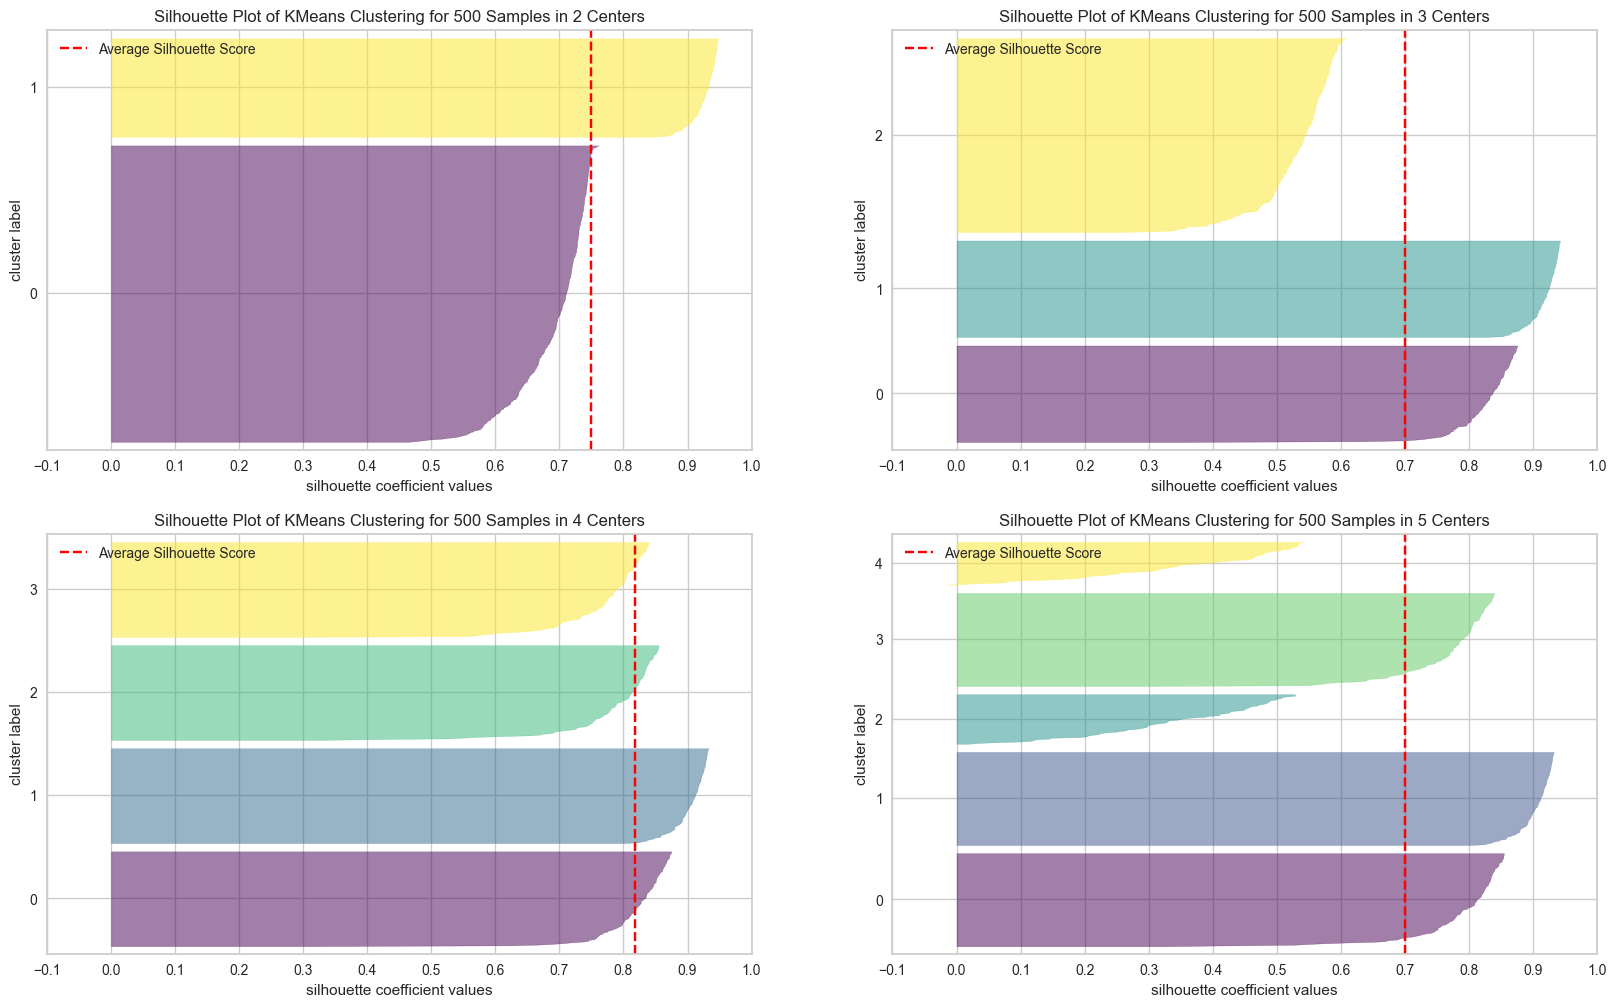

In [33]:
clusters = [ 2, 3, 4, 5 ]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

for k, ax in zip(clusters, axes.ravel()):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    
    visualizer = SilhouetteVisualizer( kmeans, colors='viridis', ax=ax)

    visualizer.fit(X)
    visualizer.finalize()